# A/B Hypothesis Testing:Ad campaign performance

The main objective of this project is to test if the ads that the advertising company runs resulted in a significant lift in brand awareness. 
This is a test run and the main objective is to validate the hypothesis algorithm you built. SmartAd ran this campaign from 3-10 July 2020.
By using classical A/B testing and machine learning,smartAds plan to result insgnificant lift to the campany.

#Data exploration and visualization

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm 
import seaborn as sns
from sklearn import preprocessing  
from sklearn.preprocessing import scale 
from scipy.stats import spearmanr #
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #
from sklearn.metrics import log_loss #
from sklearn import metrics
from matplotlib import rcParams #
from matplotlib.pyplot import pie, axis, show
from scipy.stats import norm  #
import warnings
warnings.filterwarnings(action="ignore")


In [10]:
import xgboost as xgb
#import sys
#!{sys.executable} -m pip install xgboost

ModuleNotFoundError: No module named 'xgboost'

BIO Data Exploration

In [2]:
#loading the data 
data = pd.read_csv("/Users/bez/desktop/10xAc/week2_Adcampaign/data/AdsmartABdata.csv")
data.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


*Hypothesis Testing*
Hypotesis 1:change in the advertisement design "won't" make a significant brand awareness
Hypotesis2:Change to the createive design will make siginificant brand awarness


In [13]:
#data set info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [13]:
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [12]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [3]:
#check columns
data.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [4]:
#dimension of data
data.shape

(8077, 9)

In [5]:
#users who answered yes 
data[(data.yes==1)].shape

(572, 9)

In [6]:
#users who answered no
data[(data.no==1)].shape

(671, 9)

In [7]:
#users who neither answered "yes" nor "no"
data[(data.yes == 0)&(data.no == 0)].shape

(6834, 9)

* Out of the 8077 users 6834 chose not to respond to the survey,need to work with a valid response *

In [8]:
#cleaning and filtering data sets with those who answered
answered =data[(data.yes == 1)|(data.no == 1)].reset_index()

In [9]:
# droping 
answered.drop('index', axis=1, inplace=True)
answered.shape

(1243, 9)

data has 9 features with unique values 

In [11]:
#get unique values of each column
answered.nunique()

auction_id     1243
experiment        2
date              8
hour             24
device_make     115
platform_os       2
browser           8
yes               2
no                2
dtype: int64

In [25]:
def count_plot(variable):
    sns.countplot(x=variable, data=answered)
    
def bar_plot(variable):
    sns.barplot(y=variable, x='yes', data=answered, orient='h')


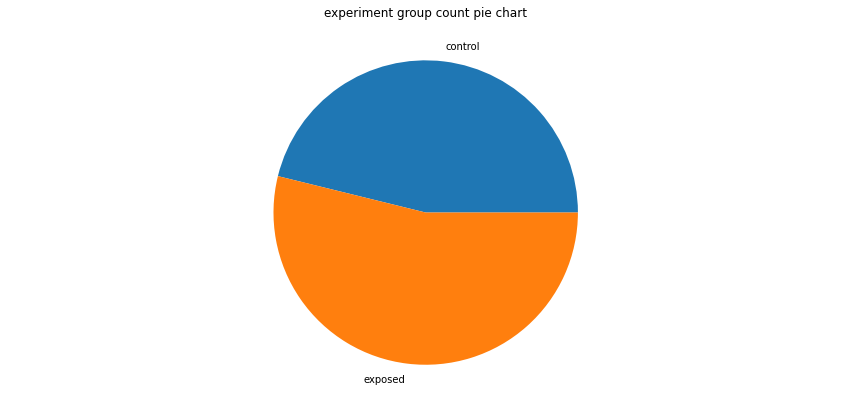

In [45]:
sums = answered["yes"].groupby(answered.experiment).sum()
plt.figure(figsize=(15, 7))
plt.title("experiment group count pie chart")
axis('equal');
pie(sums, labels=sums.index);
show()

the above pie chart shows more users in the exposed group

<AxesSubplot:xlabel='experiment', ylabel='yes'>

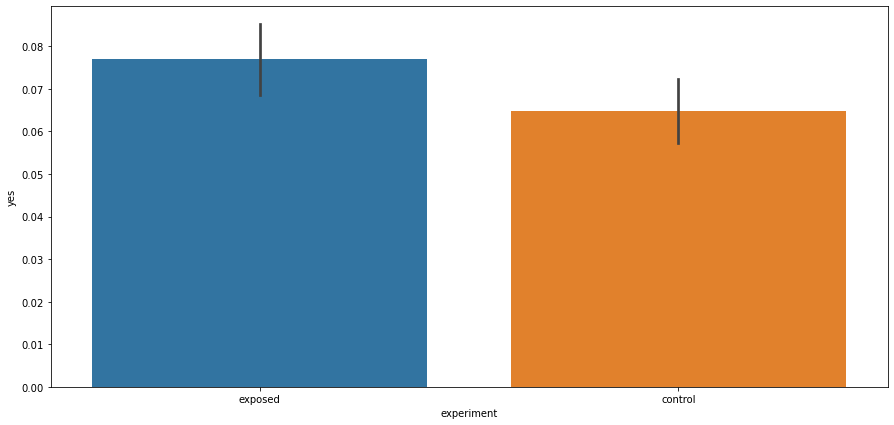

In [44]:
# yes 
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x='experiment', y='yes')

*Date*plot showing more users answered on 2020-07-03

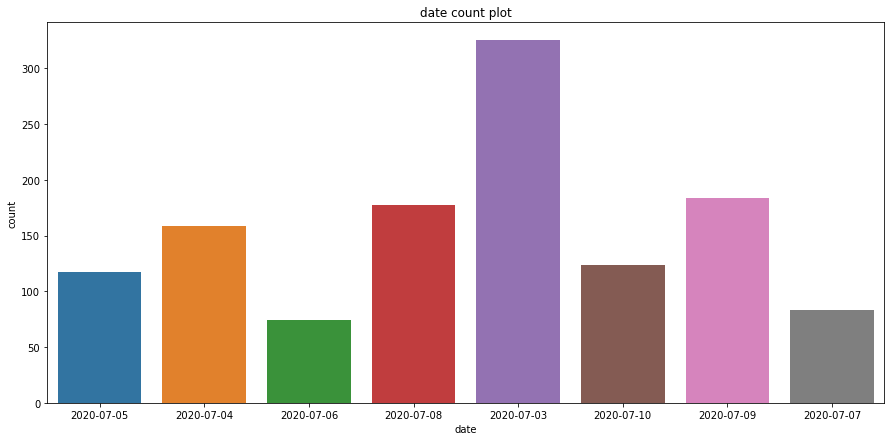

In [43]:
#plot value date 
plt.figure(figsize=(15, 7))
plt.title("date count plot")
count_plot( "date")


*Hour*plot showing more users answered on 15:00 o'clock

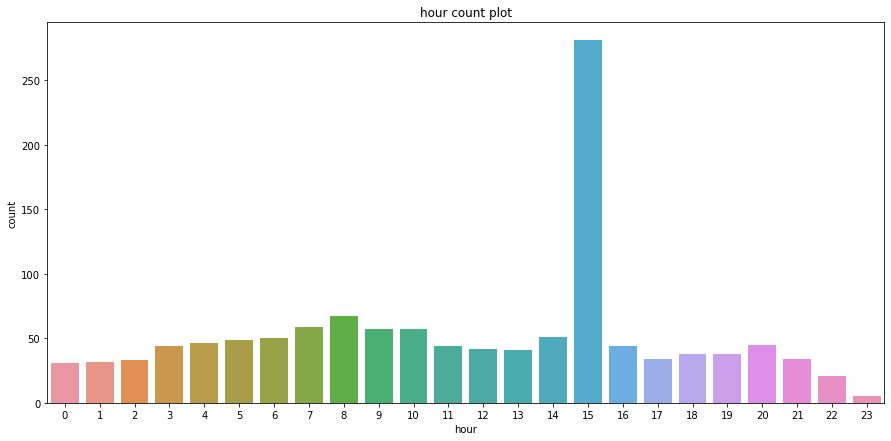

In [42]:
#
plt.figure(figsize=(15, 7))
plt.title("hour count plot")
count_plot( "hour")

Chrome Mobile browser to be the most used browser among the users

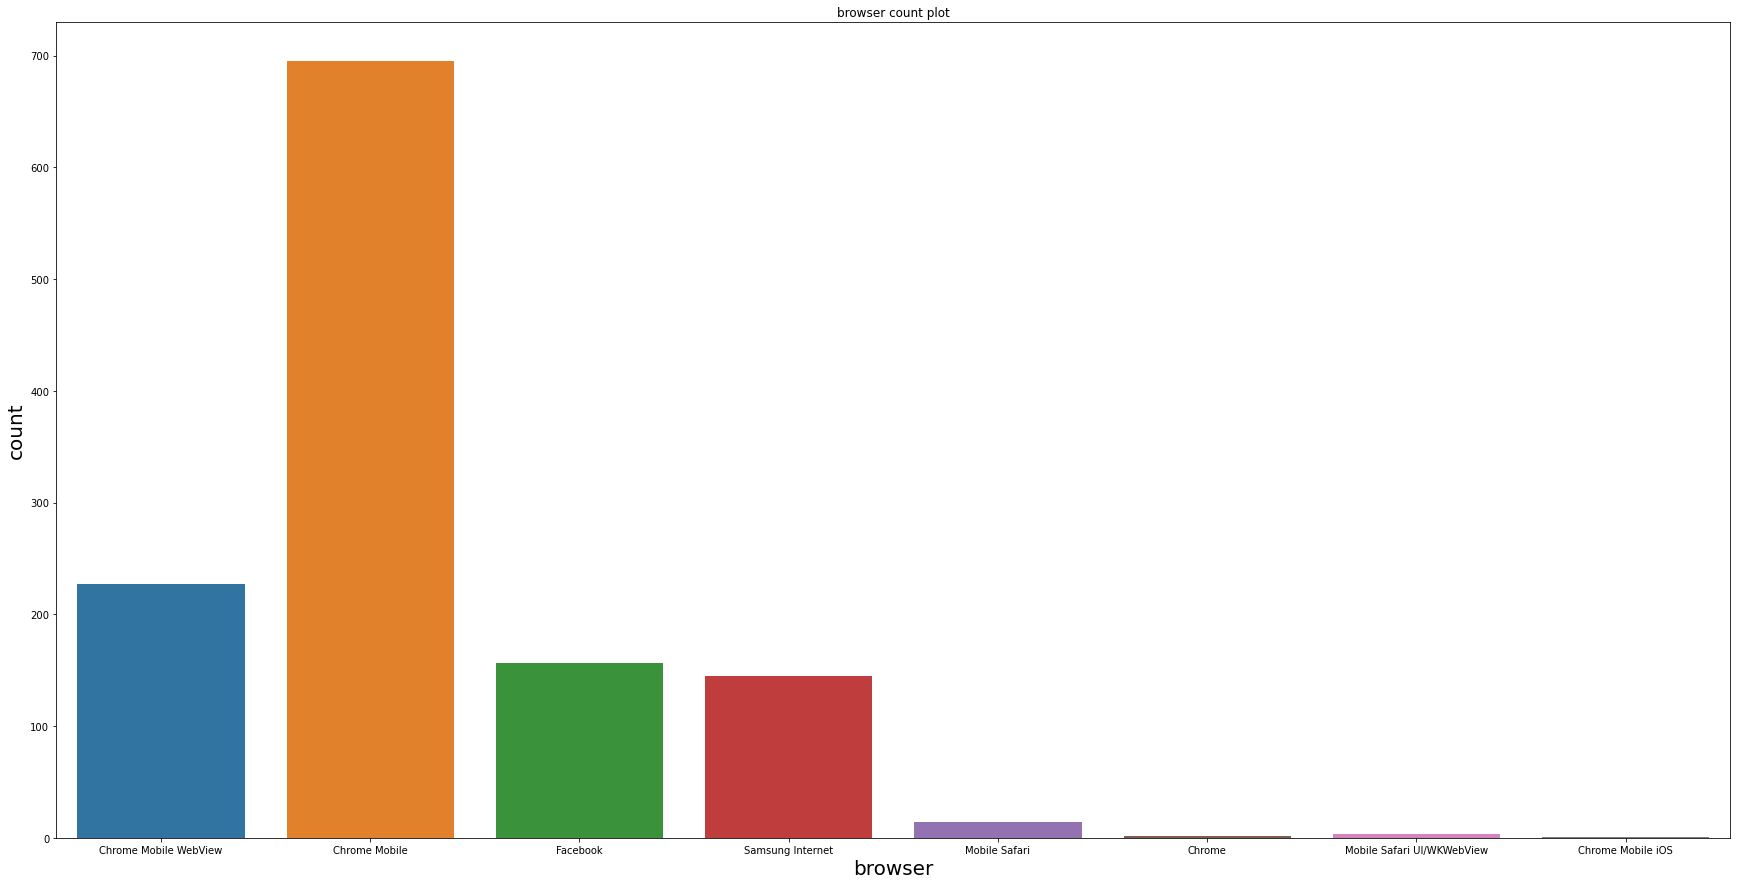

In [51]:
#plot value Hour
plt.figure(figsize=(30,15))
plt.title("browser count plot")
count_plot("browser")

 plot showing most of users are using a generic smartphone

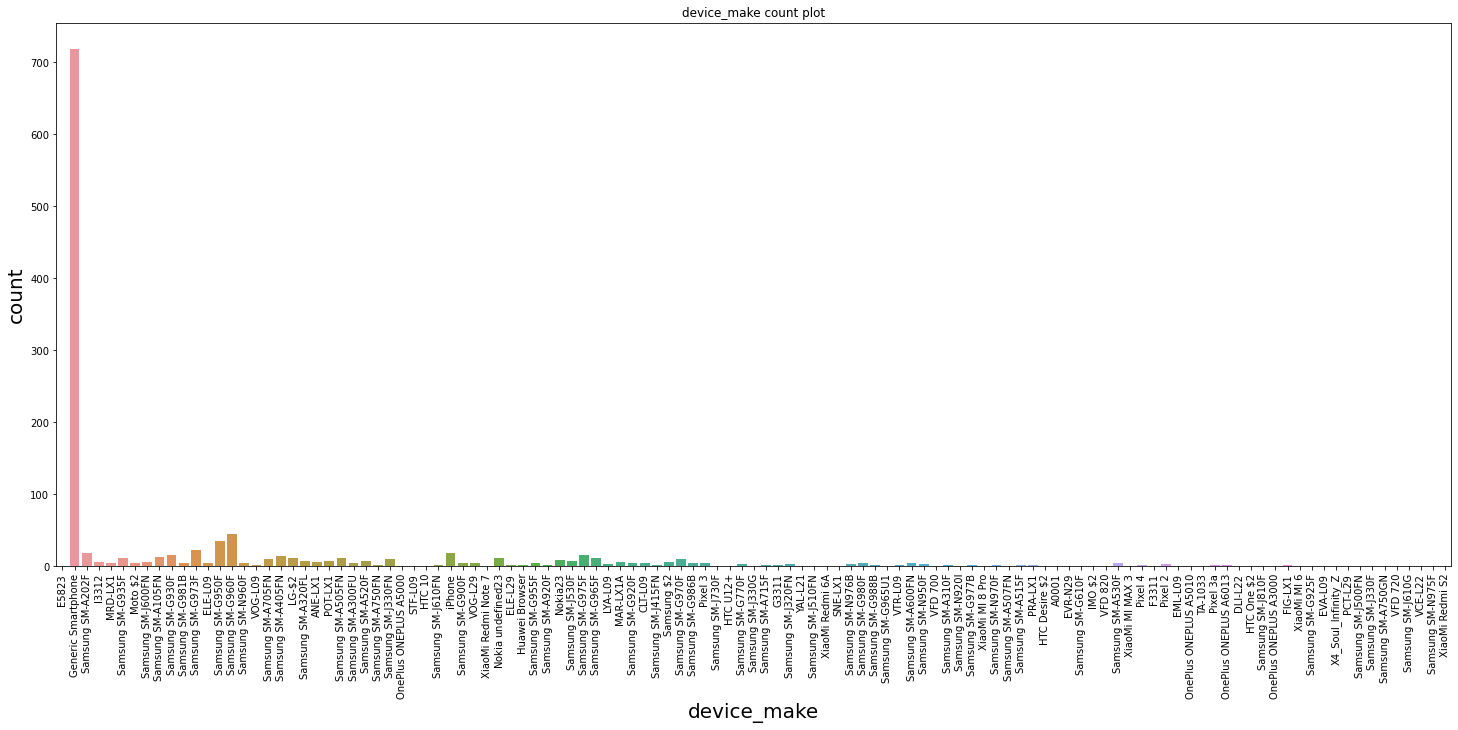

In [52]:
#rotate x-axis labels 90 degree so we can 
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.title("device_make count plot")
count_plot("device_make")

The bar plots below show the relationships between the features
and the responses to the advertisement and how is the answers are related to each feature 

shows the portion of users who said "yes" per browser

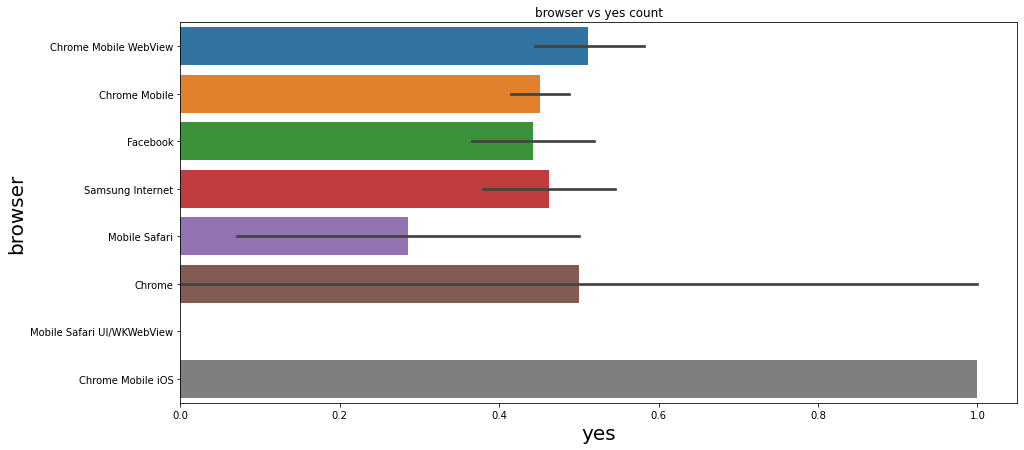

In [55]:
plt.figure(figsize=(15,7))
plt.title("browser vs yes count")
bar_plot('browser')

plot shows the portion of users who said "yes" per shows Date

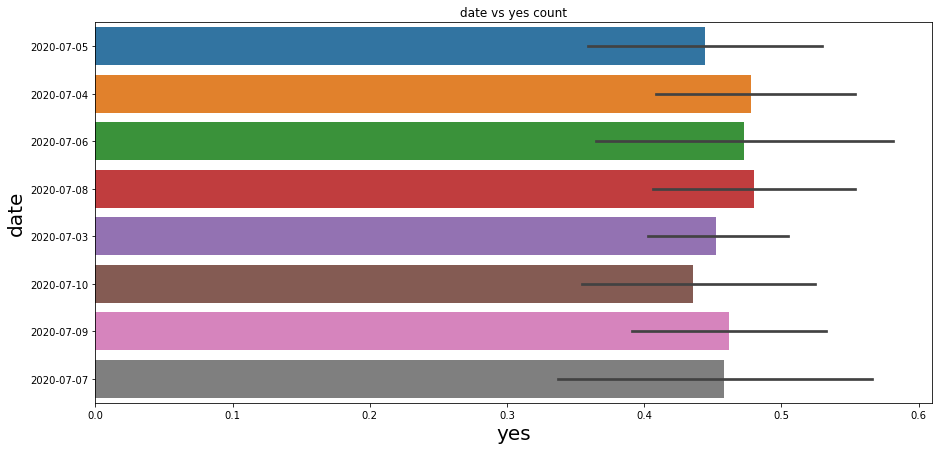

In [56]:
plt.figure(figsize=(15,7))
plt.title("date vs yes count")
bar_plot('date')

In [ ]:
plot shows the portion of users who said "yes" per hour. It looks users responding at 23:00 o'clock,
    with any number said "yes"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

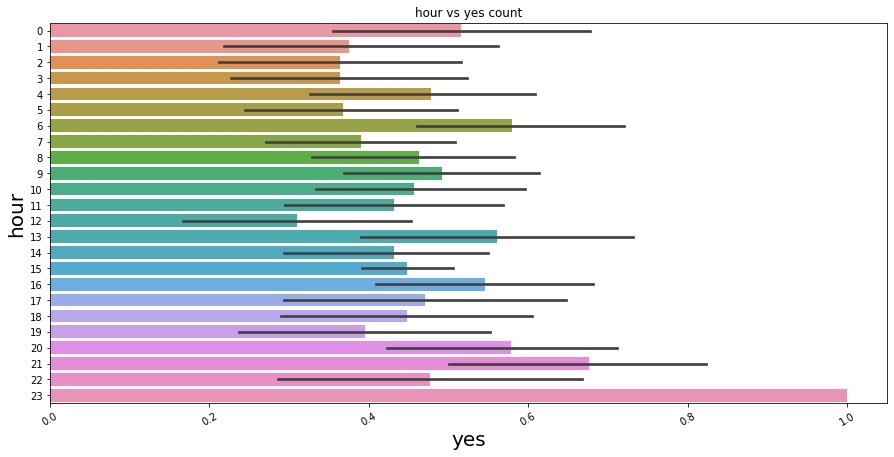

In [61]:
plt.figure(figsize=(15,7))
plt.title("hour vs yes count")
bar_plot('hour')

plot shows that more users in the exposed group said yes than in control group.
To prove this scientificaly we need to do A/B testing 

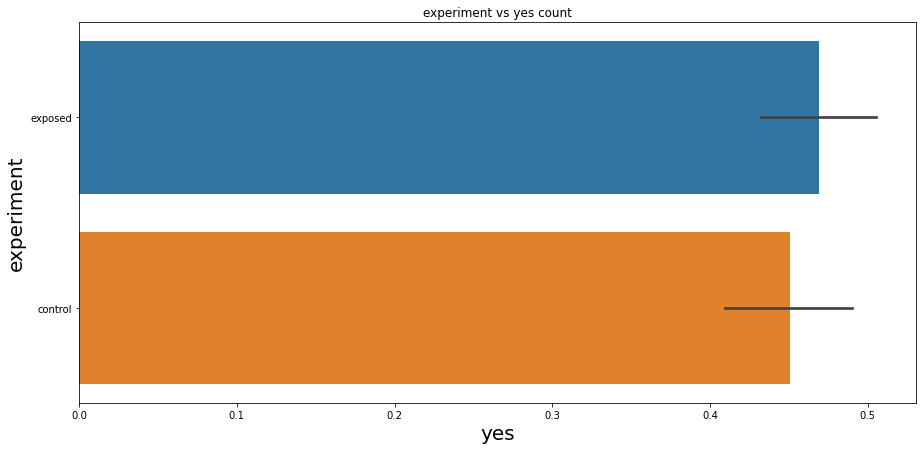

In [59]:
plt.figure(figsize=(15,7))
plt.title("experiment vs yes count")
bar_plot('experiment')

In [64]:
answered.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [65]:
answered.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
